<a href="https://colab.research.google.com/github/charlie-aashutosh/Deep-Learning/blob/master/Creating_ANN_from_scratch_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
from google.colab import files
files=files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [4]:
df = pd.read_csv('Churn_Modelling.csv')
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
#converting the categorical data - by using dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [10]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [11]:
#concatinating these into X dataset
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns - since we converted them to dummy variables
X=X.drop(['Geography','Gender'],axis=1)


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling - at times x1, x2, x3 and so on have different magnitude and so while computing wi.xi+bi - it would take time so we try to scale all the given imput features to one scale - we will be able to reach the globl minima easily and wt. updation will be also easy while performing backpropagation

In [15]:
# Feature Scaling -
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

1.Sequential - used for creating NN
2.Dense - the hidden layers we want in our NN
3.LeakyReLU and others are the activation funtions used
4.Dropout - used for Regularization

In [14]:
# Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
# Initialising the ANN - empty NN
classifier = Sequential()

In [18]:

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.3))

In [31]:

# Adding the second hidden layer
classifier.add(Dense(units= 6, kernel_initializer= 'he_uniform',activation='relu'))
classifier.add(Dropout(0.4))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))
classifier.add(Dropout(0.2))

In [32]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 12        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [33]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 345us/step - loss: 1.1211 - accuracy: 0.6397 - val_loss: 0.4712 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 268us/step - loss: 1.0708 - accuracy: 0.7608 - val_loss: 0.4566 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 230us/step - loss: 1.0261 - accuracy: 0.7916 - val_loss: 0.4450 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 1s 203us/step - loss: 0.9748 - accuracy: 0.7960 - val_loss: 0.4250 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 1s 211us/step - loss: 0.9346 - accuracy: 0.7962 - val_loss: 0.4134 - val_accuracy: 0.7955
Epoch 6/100
5359/5359 [==============================] - 1s 209us/step - loss: 0.9837 - accuracy: 0.7962 - val_loss: 0.4133 - val_accuracy: 0.7955
Epoch 7/100
5359/5359 [==============================] - 1s 204us/step

In [34]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [37]:
cm

array([[1595,    0],
       [ 405,    0]])

In [38]:

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [39]:
score

0.7975

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


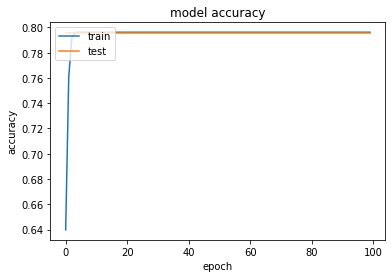

In [41]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()